In [1]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fgsm.deep_convnet import DeepConvNet
from common.functions import softmax
from common.trainer import Trainer

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from keras.utils import np_utils
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
num_classes = 10
epochs = 20
batch_size = 100

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [4]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train,train_size=0.5)
print("X_train1.shape", X_train1.shape)
print("y_train1.shape", y_train1.shape)
print("X_train2.shape", X_train2.shape)
print("y_train2.shape", y_train2.shape)

X_train1.shape (30000, 28, 28)
y_train1.shape (30000,)
X_train2.shape (30000, 28, 28)
y_train2.shape (30000,)


/home/ryuto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
max_length = 10
X_train3 = []
y_train3 = []
for i, (x, y) in enumerate(zip(X_train2, y_train2)):
    if len(y_train3) == max_length * 10:
        break
    elif y_train3.count(y) == max_length:
        continue
    else:
        X_train3.append(x)
        y_train3.append(y)
        
X_train3 = np.array(X_train3)
y_train3 = np.array(y_train3)

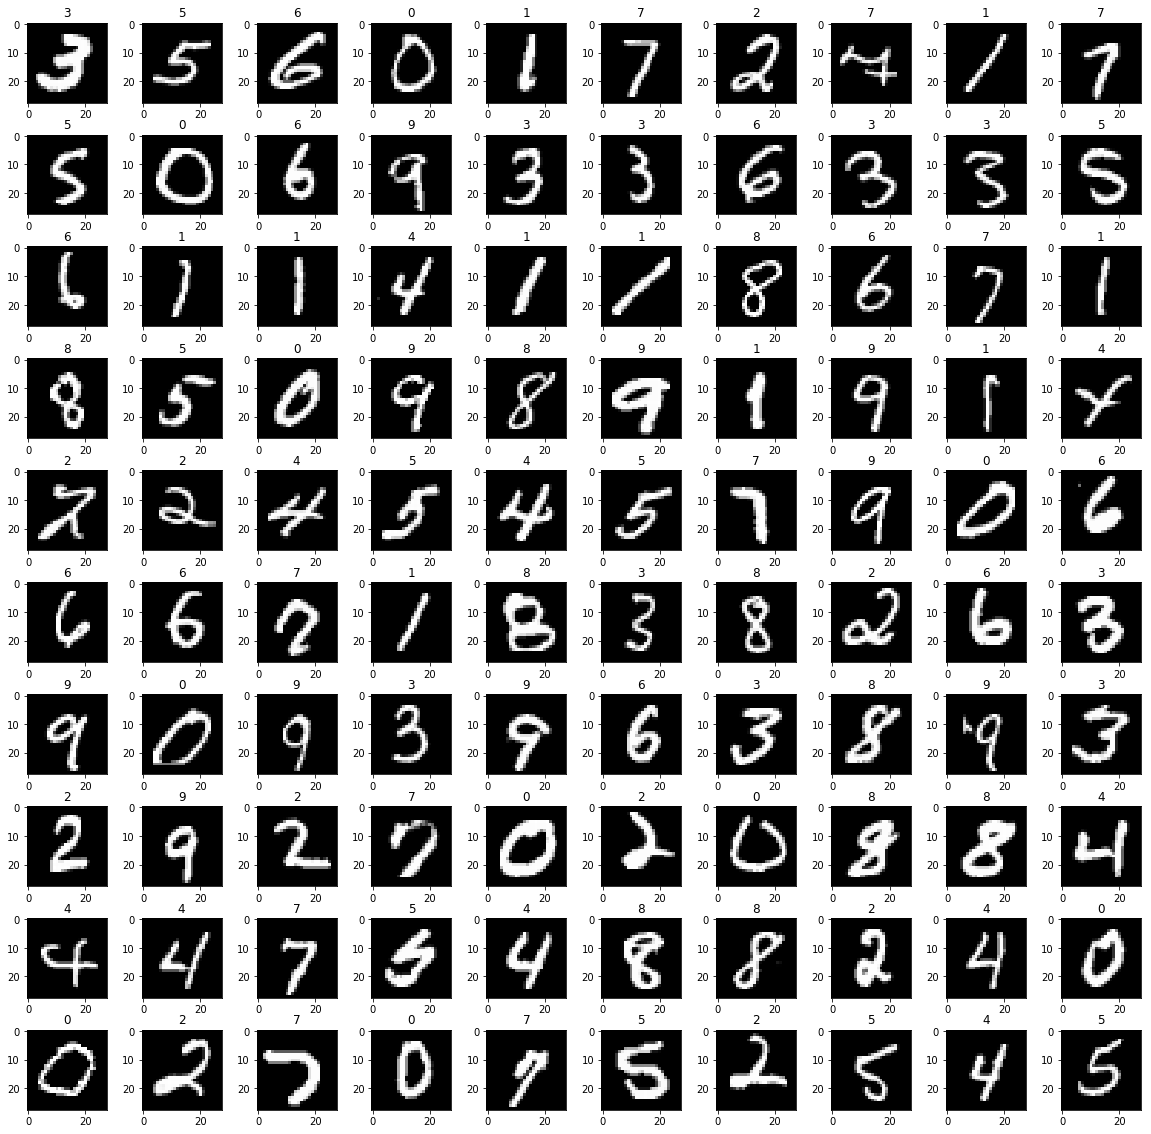

In [6]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
for i, (x, y) in enumerate(zip(X_train3, y_train3)):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(x, 'gray')
    ax.set_title(str(y))

plt.show()

In [7]:
X_train1 = X_train1.reshape(X_train1.shape[0], 784).astype('float32') / 255
X_train3 = X_train3.reshape(X_train3.shape[0], 1, 28, 28).astype('float32') / 255

y_train1 = keras.utils.to_categorical(y_train1, num_classes)

X_test1 = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
X_test2 = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255

y_test1 = keras.utils.to_categorical(y_test, num_classes)
y_test2 = y_test

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_____________________________________________________________

In [9]:
history = model.fit(X_train1, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test1, y_test1))
score = model.evaluate(X_test1, y_test1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 4s 148us/step - loss: 0.3236 - acc: 0.9005 - val_loss: 0.1414 - val_acc: 0.9577
Epoch 2/20
30000/30000 [==============================] - 4s 128us/step - loss: 0.1359 - acc: 0.9590 - val_loss: 0.1067 - val_acc: 0.9671
Epoch 3/20
30000/30000 [==============================] - 4s 132us/step - loss: 0.0952 - acc: 0.9713 - val_loss: 0.0974 - val_acc: 0.9719
Epoch 4/20
30000/30000 [==============================] - 4s 133us/step - loss: 0.0709 - acc: 0.9788 - val_loss: 0.1070 - val_acc: 0.9704
Epoch 5/20
30000/30000 [==============================] - 4s 134us/step - loss: 0.0554 - acc: 0.9822 - val_loss: 0.1033 - val_acc: 0.9750
Epoch 6/20
30000/30000 [==============================] - 4s 131us/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.1006 - val_acc: 0.9746
Epoch 7/20
30000/30000 [====

In [10]:
model_json_str = model.to_json()
open('mnist_mlp_model_few.json', 'w').write(model_json_str)
model.save_weights('mnist_mlp_weights_few.h5');
print('model saved.')

model saved.


In [11]:
model_pred = model.predict(X_train3.reshape(X_train3.shape[0], 784))
model_pred.shape

(100, 10)

In [19]:
max_epochs = 25

network = DeepConvNet()
trainer = Trainer(network, X_train3, model_pred, X_test2, y_test2,
                  epochs=max_epochs, mini_batch_size=10,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.3436256810785343
=== epoch:1, train acc:0.14, test acc:0.1 ===
train loss:2.121625025861592
train loss:2.2927653744689507
train loss:2.3022536688522637
train loss:2.4619076541193237
train loss:2.217379585065719
train loss:2.4923763370129097
train loss:2.3890393379422075
train loss:2.429888425227278
train loss:2.4235294462728936
train loss:2.26235717969961
=== epoch:2, train acc:0.21, test acc:0.156 ===
train loss:2.28063421194155
train loss:2.32783869446884
train loss:2.396127856282715
train loss:2.357798623615591
train loss:2.2985187441616874
train loss:2.381694973304104
train loss:2.3090470235103844
train loss:2.317512969878647
train loss:2.2471932128678835
train loss:2.322351399610872
=== epoch:3, train acc:0.17, test acc:0.191 ===
train loss:2.245927392652951
train loss:2.1395377765225456
train loss:2.2435289810051517
train loss:2.2824578522542436
train loss:2.242564524317913
train loss:2.338460327341543
train loss:2.3255660259513116
train loss:2.2239751417768603
train

train loss:0.945184425189621
train loss:1.2128985975521112
train loss:1.1369958002214893
=== epoch:25, train acc:0.94, test acc:0.711 ===
train loss:1.3704393943861328
train loss:1.3133543608217075
train loss:1.13320613029737
train loss:1.5655531779374217
train loss:0.7530082896770918
train loss:1.5224354271286642
train loss:1.8881277854746106
train loss:0.9545576054946606
train loss:1.5379121754032872
=============== Final Test Accuracy ===============
test acc:0.8055


In [20]:
test_acc = network.accuracy(X_test2, y_test2)
print("正答率：", test_acc)

正答率： 0.8055


Saved Network Parameters!


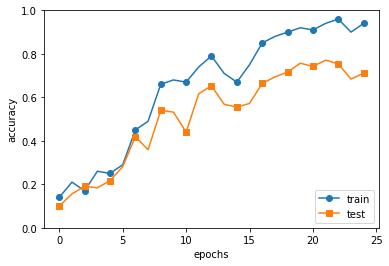

In [21]:
# パラメータの保存
network.save_params("keras_clone_params_few.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
# plt.show()
plt.savefig('graph_keras_clone_half.png')